# Session-4 - File 1

Session 3 ended for me with usage of Stratified K-fold as a training paradigm. This led to a significant improvement in convergence rate and reduction of parameters to achieve the state of art accuracy of 99.82% on the validation data. 

I decided not to use dropout or batch normalization are again statistical techniques that statistically make the system robust. In case of dropout randomly neurons are kept away from activation thus ignoring them being fired. Batch normalization ensures in a batch of data only positive values that are higher than the average are considered. While both techniques have certain advantages, stratified k-fold ensures equitable amount of classes of data are used in each batches so that the training is more homogenous. Moreover, the improvement was so significant that the need for using these other two statistical techniques was not realized. And total number of parameters used was 11,740. 

As part of the improvement, I looked at 2 other problems:

1. What is the absolute minimum number of parameters required to attain 99.4% accuracy?
2. What can be the minimum number of parameters that can be utilized to attain the state of the art?

## Minimum Number of Parameters Needed

In this experiment, I started with an assumption what can be the theoretical minimum number of parameters for reasonable accuracy. Numbers can be topographically mapped to digital LED displays. LED displays have 7 distict edges that light-on based on the values.
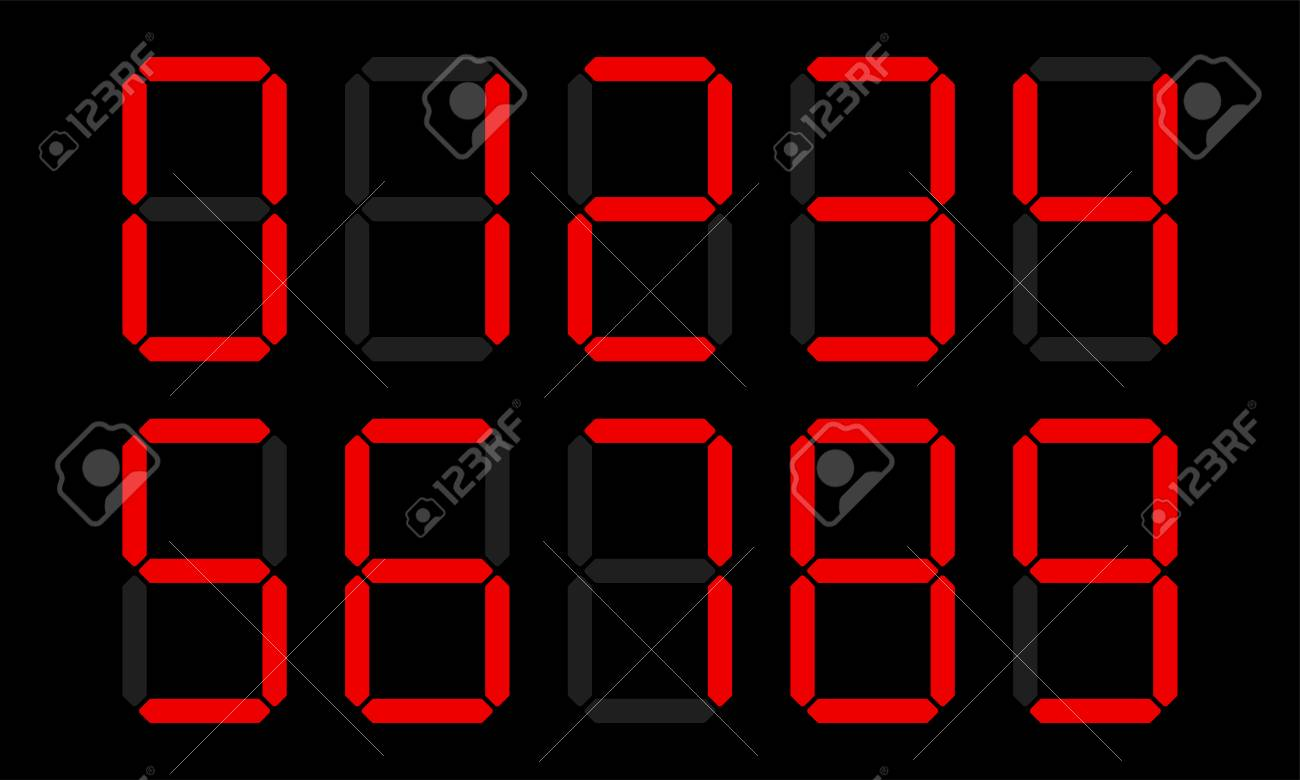

Hence, from a geometrical topology perspective the it's enough to find 7 edges from the image and if the kernel can estimate that then we are in the right direction. While this can be a basis for assumption this may not be enough for handwriting recognition perspective. As can be seen in the final plot of the kernel extraction feature maps, what got actually extracted have very little or almost no bearing on the digital segment assumption. The final output are mostly spatial frequency patterns. This is likely as due to freeform nature of the inputs the images will tend to extract more of relationship of geometric features. Like connectedness of 2 lines at certain angles like 7 etc. 

Higher order kernel image maps are very much blurred. Although not studied explicitly I assume the influence on weights may not be as significant. In may sample implementations post maxpooling many implementations tend to switch to dense. Dense assumption ignores the topological dependency of adjacent image blocks and thus tends to blur the spatial dependence as strongly represented by CNNs. A small Dense node is used to match output from 12 to 10 which is about 10% of the nodes. 

- *Paramters*: 1174
- *Validation Accuracy*: 99.42
- *Training*: Stratified K-fold

## Import Libraries and modules

In [2]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Using TensorFlow backend.


## Load pre-shuffled MNIST data into train and test sets

- Training set contains - 60000 images mapping to categories of 0-9 numbers
- Test set contains - 10000 images

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Plot Image

Plot the first image in the series to understand the image data and get a feel for a sample. Handwritten number 5 is in the set. 

(60000, 28, 28)


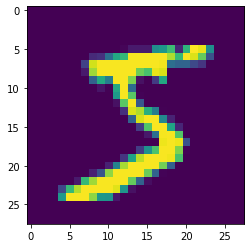

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

## Add Channel Information

The dataset does not have a channels layer as it's a grey scale image. The channel layer is needed for image manipulation and understanding later. So a single channel is extended as a 4th dimension. 

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

## Convert the Data to Float

The data is to be converted to float format for better computational resolutions. This also can be GPU dependent. Some GPUs may perform faster on fixed point or integral data type. Since the accuracy requirements higher in this problem one may prefer floats to gain better data resolution. 

In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

## List Multiclass Data of the Dependent Variable

First 10 category outputs of the dependent variable in the training set. 

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## Conversion to Categorical One Hot Vector Notation

Neural networks are best represented as 0 and 1 post final activation. Particularly, when softmax is used as the activation function. This notation makes it easier for modeling. 

In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

## List One Hot Vector Notation of the Dependent Variable

First 10 category outputs of dependent variable in training set.

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Definition of the Model

1. Sequential model of Keras
2. Extracting initial 32x3x3 kernel and extract simple edges 
3. Aggregate the features to 10x1x1 kernel
4. Apply 10x26x26 to extract further features and output of 10x1x1
5. Flatten the output to 10 outputs matching the One Hot Vector
6. Apply the softmax activation.

## Improved Model

An improved model is proposed with a goal to show validation accuracy above 99.4%. A sequential Model is designed with:

1. Two 16x3x3 Convolutiion with ReLu Activation
2. MaxPool2D of 2x2 
3. Five 10x3x3 Convolutiion with ReLu Activation
4. Flatten the results 
5. One dense layer of 40 to 10 as the final outcome
6. Softmax activation to match the outcome to One Hot Vector notation

Overall 11,740 parameters

In [196]:
model = Sequential()
model.add(Conv2D(7, (3, 3), activation='relu', input_shape=(28,28,1), name='c1'))
model.add(Conv2D(7, (3, 3), activation='relu', name='c2'))
model.add(MaxPooling2D(2, 2, name='p1'))
model.add(Conv2D(3, (3, 3), activation='relu', name='c3'))
model.add(Conv2D(3, (3, 3), activation='relu', name='c4'))
model.add(Conv2D(3, (3, 3), activation='relu', name='c5'))
model.add(Conv2D(3, (3, 3), activation='relu', name='c6'))
model.add(Conv2D(3, (3, 3), activation='relu', name='c7'))
model.add(Flatten(name='f'))
model.add(Dense(10, name='d'))
model.add(Activation('softmax', name='a'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
c1 (Conv2D)                  (None, 26, 26, 7)         70        
_________________________________________________________________
c2 (Conv2D)                  (None, 24, 24, 7)         448       
_________________________________________________________________
p1 (MaxPooling2D)            (None, 12, 12, 7)         0         
_________________________________________________________________
c3 (Conv2D)                  (None, 10, 10, 3)         192       
_________________________________________________________________
c4 (Conv2D)                  (None, 8, 8, 3)           84        
_________________________________________________________________
c5 (Conv2D)                  (None, 6, 6, 3)           84        
_________________________________________________________________
c6 (Conv2D)                  (None, 4, 4, 3)           84        
__________

## Training Process

While most of the model part is fairly kept standard with CNN with a combination of convolutions and maxpooling the training approach is enhanced with an ensemble technique called stratfied K-fold. 

The training for a neural network can be improved when optimal statistical mixing can be carried out for the input for a homogenized mix of batches. This is achieved by stratified k-fold. Here the training data is broken into disjoint sets of 5 with almost equal sample occurence of any of the classes of 0-9 in each of the groups. 4 such groups are used as a training set and validated against one of the set as validation set. Thus the results are cross validated against each other. This ensures the batches are homogeneous and uniformly exposed to the each category of the inputs. Each such groups is run for 10 epochs but parameters being fed from the previous run. 

Moreover, in every epoch the validation rsults are computed with the original test dataset of 10000 data points.


The technique has been a small modification of explanation given in the [article](https://machinelearningmastery.com/evaluate-performance-deep-learning-models-keras/)

In [197]:
from sklearn.model_selection import StratifiedKFold
seed = 7
np.random.seed(seed)
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
(X, Y) = (X_train, y_train)
for train, test in kfold.split(X, Y):
    # Fit the model
    model.fit(X[train], Y_train[train], epochs=10, batch_size=32, verbose=1, validation_data=(X_test, Y_test))
    # evaluate the model
    scores = model.evaluate(X[test], Y_train[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)

Train on 47995 samples, validate on 10000 samples
Epoch 1/10
47995/47995 [==============================] - 17s 352us/step - loss: 0.1581 - acc: 0.9447 - val_loss: 0.0869 - val_acc: 0.9697
Epoch 2/10
47995/47995 [==============================] - 10s 218us/step - loss: 0.0774 - acc: 0.9730 - val_loss: 0.0599 - val_acc: 0.9793
Epoch 3/10
47995/47995 [==============================] - 11s 219us/step - loss: 0.0585 - acc: 0.9797 - val_loss: 0.0524 - val_acc: 0.9819
Epoch 4/10
47995/47995 [==============================] - 11s 219us/step - loss: 0.0500 - acc: 0.9829 - val_loss: 0.0455 - val_acc: 0.9843
Epoch 5/10
47995/47995 [==============================] - 10s 217us/step - loss: 0.0442 - acc: 0.9851 - val_loss: 0.0389 - val_acc: 0.9864
Epoch 6/10
47995/47995 [==============================] - 10s 218us/step - loss: 0.0391 - acc: 0.9866 - val_loss: 0.0343 - val_acc: 0.9886
Epoch 7/10
47995/47995 [==============================] - 11s 219us/step - loss: 0.0360 - acc: 0.9878 - val_loss: 0.

## Results

The final cross validation score is averaged over each of the iterations are stated. As expected, the cross validation being on the training data there is a continuous pattern of overfitting of the data. However, what is interesting to observe the validation score over the test data has also significantly improved at 99.81%. 

Now that the test data is not used for any of the training purposes, the result cannot be construed as overfitting. Although, the learning curve has not been plotted to confirm the same. The crossvalidation results are not significantly different from the test data validation confirming the training is fairly uniform for the overall population. 

The state of art is reported as: https://paperswithcode.com/sota/image-classification-on-mnist with https://paperswithcode.com/paper/rmdl-random-multimodel-deep-learning-for using a random combination of DNN, CNN, and RNN, a simple statistical mixing of training data can almost produce similar outcome with the MNIST dataset.

In [198]:
cvscores

[98.92794665074854,
 99.18930164636562,
 99.33416638374328,
 99.3615067913362,
 99.42480787192635]

In [199]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [200]:
print(score)

[0.016847066891938448, 0.9947599960327148]


In [201]:
y_pred = model.predict(X_test)
np.set_printoptions(precision=1, suppress=True)
print(y_pred[:10])
print(y_test[:10])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[7 2 1 0 4 1 4 9 5 9]


In [202]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'c1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    nfig = int(layer_output.shape[3])
    if nfig >= 35:
        plot_x, plot_y = 6, 6
    elif nfig >= 23:
        plot_x, plot_y = 4, 6
    elif nfig >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, nfig+1
    
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    if plot_x > 1:
        ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
        ax[0, 0].set_title('Input image')
    else:
        ax[0].imshow(img.reshape((28, 28)), cmap = 'gray')
        ax[0].set_title('Input image')    
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        if x * plot_y + y > nfig:
            break
        if plot_x > 1:
            ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
            ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))
        else:
            ax[y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
            ax[y].set_title('filter %d' % (x * plot_y + y - 1))

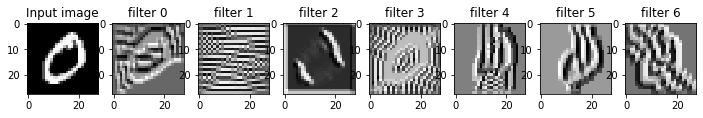

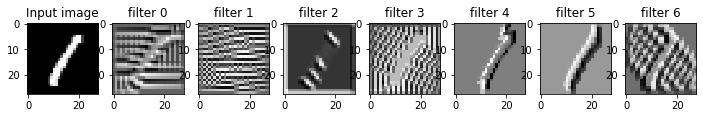

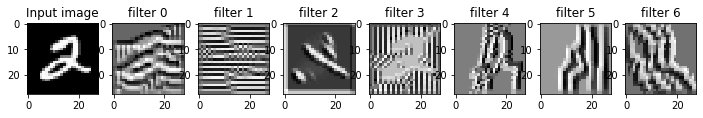

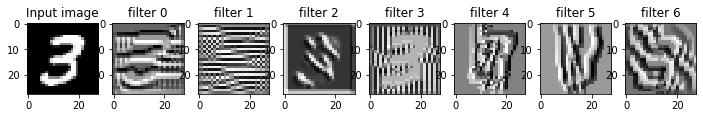

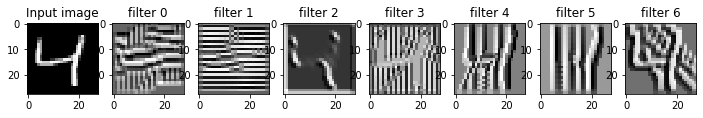

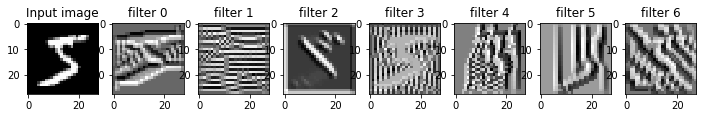

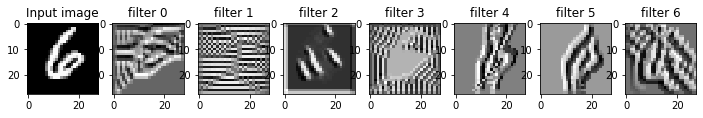

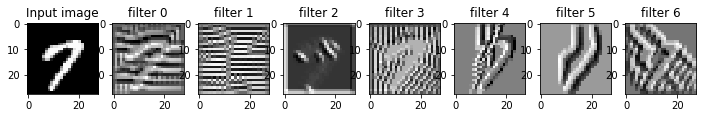

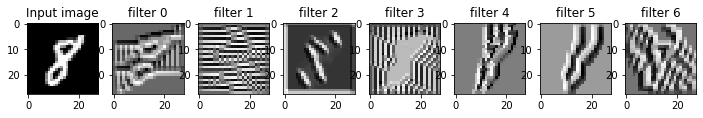

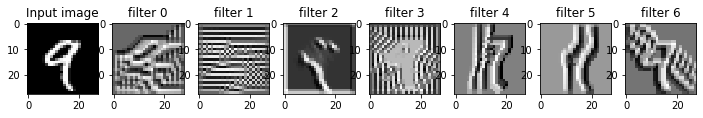

In [203]:
vis_img_in_filter(img = np.array(X_train[1]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = 'c1')
vis_img_in_filter(img = np.array(X_train[3]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = 'c1')
vis_img_in_filter(img = np.array(X_train[5]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = 'c1')
vis_img_in_filter(img = np.array(X_train[7]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = 'c1')
vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = 'c1')
vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = 'c1')
vis_img_in_filter(img = np.array(X_train[13]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = 'c1')
vis_img_in_filter(img = np.array(X_train[15]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = 'c1')
vis_img_in_filter(img = np.array(X_train[17]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = 'c1')
vis_img_in_filter(img = np.array(X_train[4]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = 'c1')

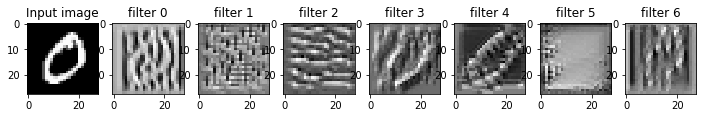

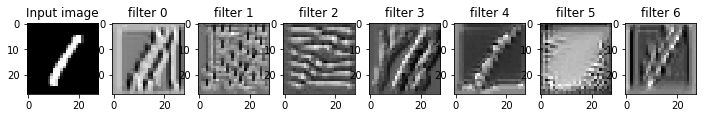

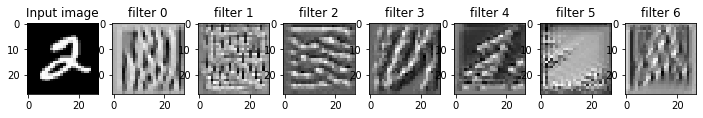

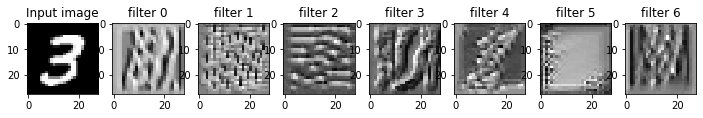

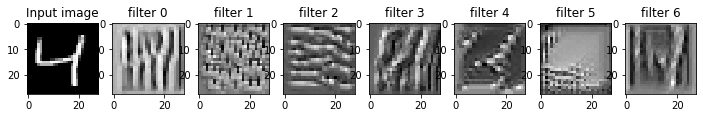

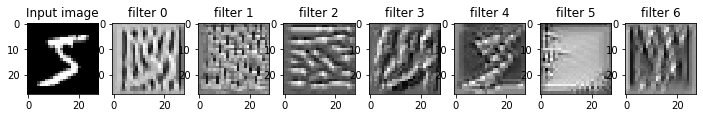

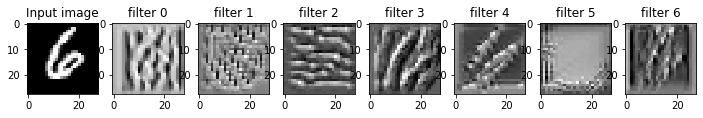

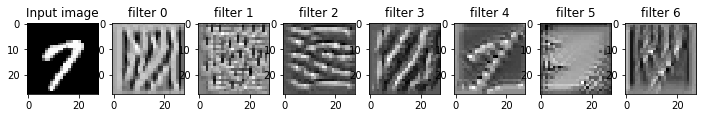

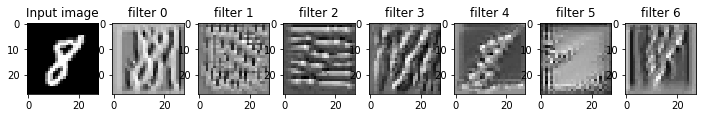

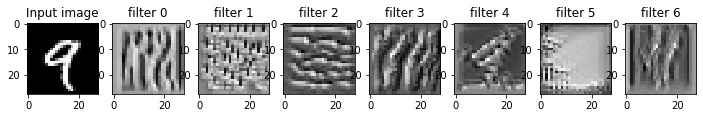

In [204]:
ln = 'c2'
vis_img_in_filter(img = np.array(X_train[1]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[3]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[5]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[7]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[13]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[15]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[17]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[4]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)

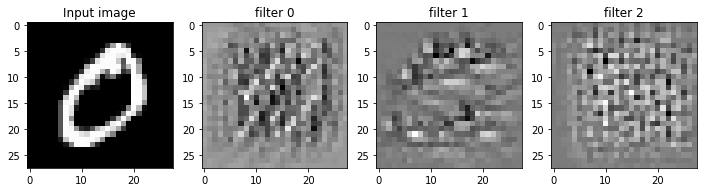

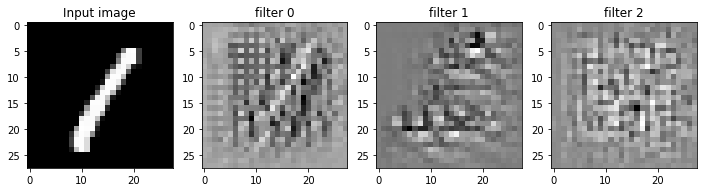

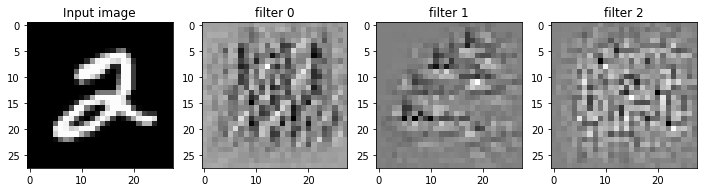

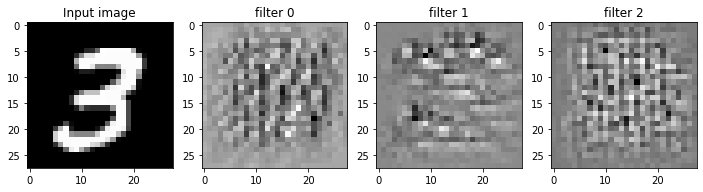

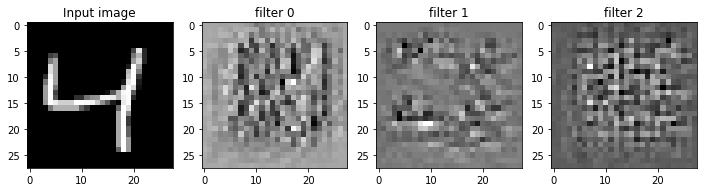

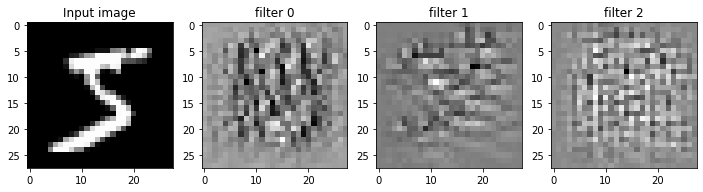

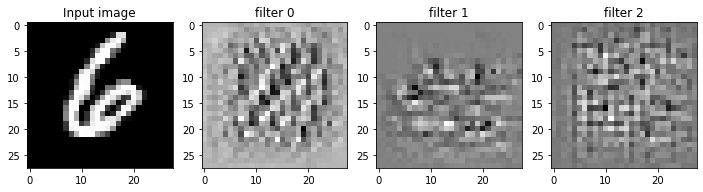

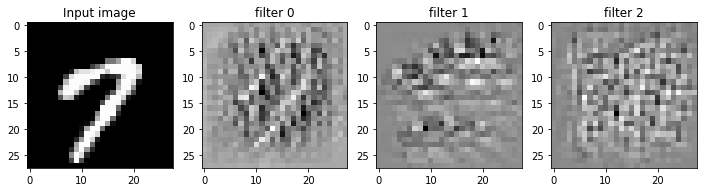

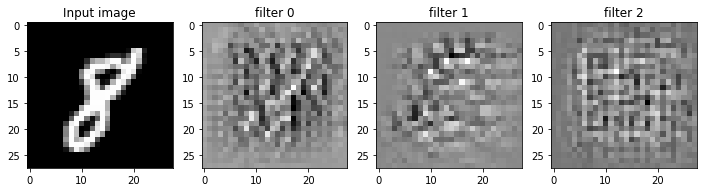

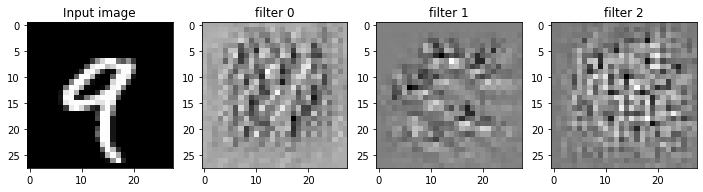

In [205]:
ln = 'c3'
vis_img_in_filter(img = np.array(X_train[1]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[3]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[5]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[7]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[13]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[15]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[17]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[4]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)

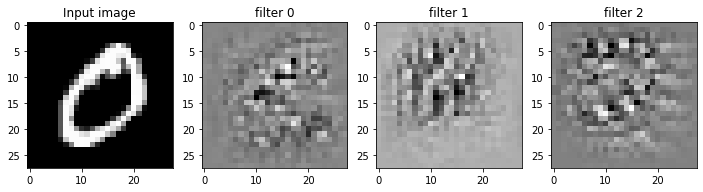

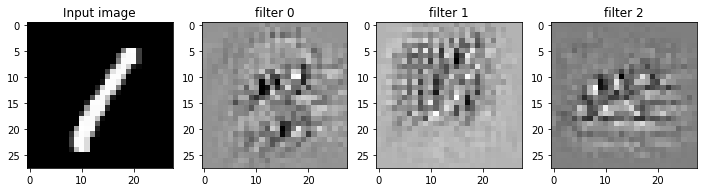

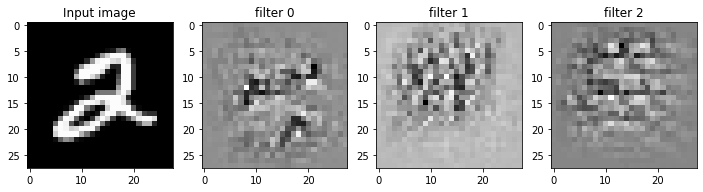

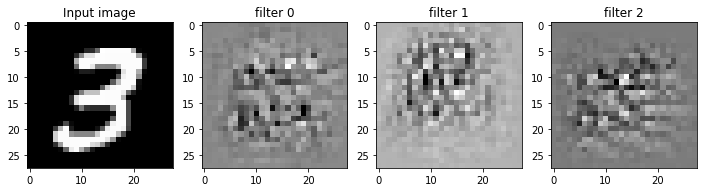

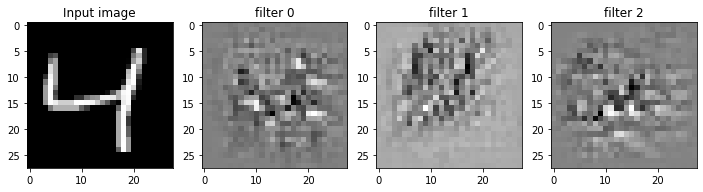

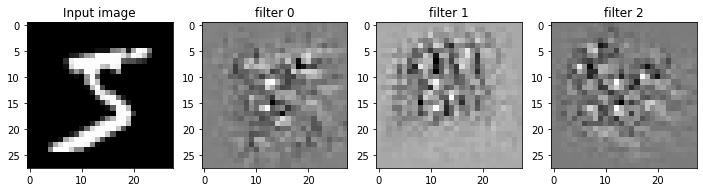

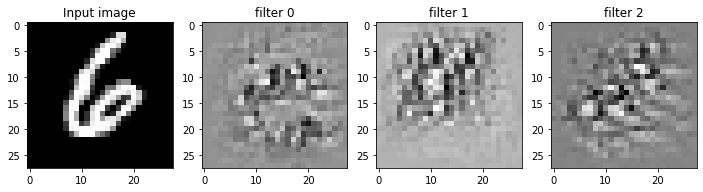

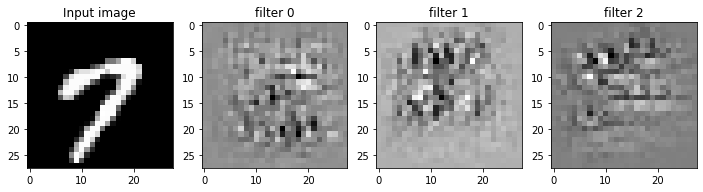

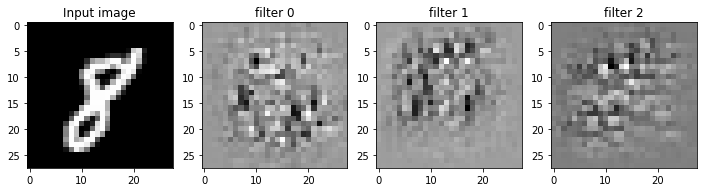

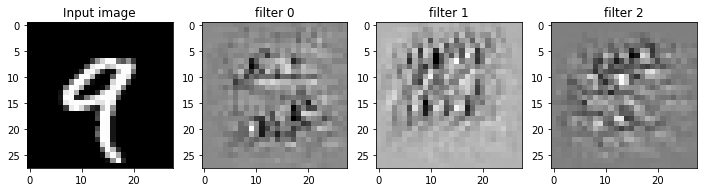

In [206]:
ln = 'c4'
vis_img_in_filter(img = np.array(X_train[1]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[3]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[5]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[7]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[13]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[15]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[17]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[4]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)

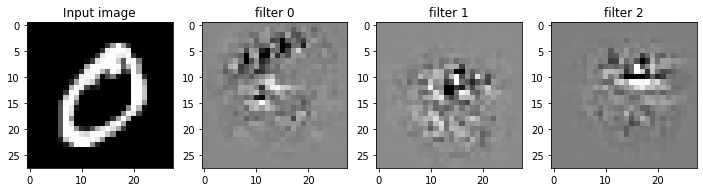

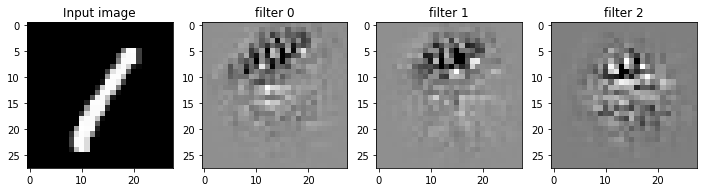

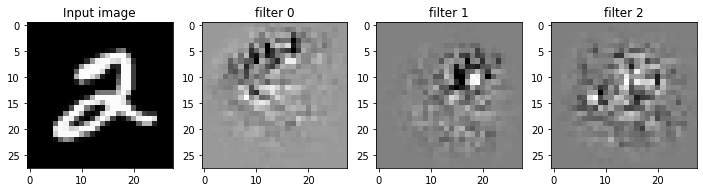

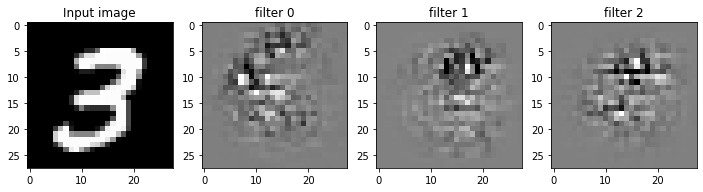

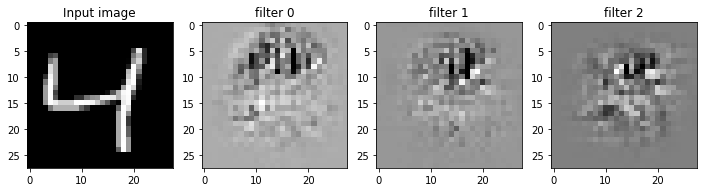

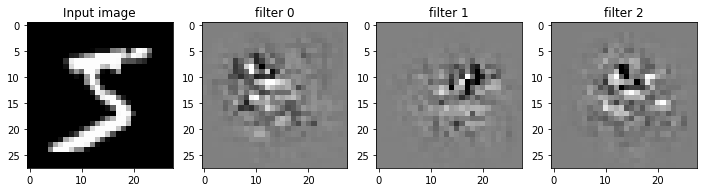

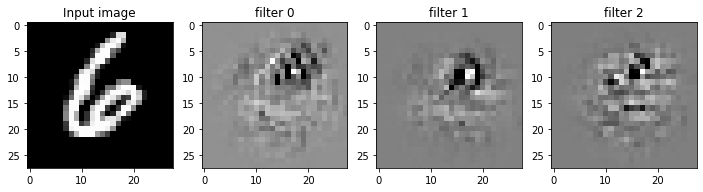

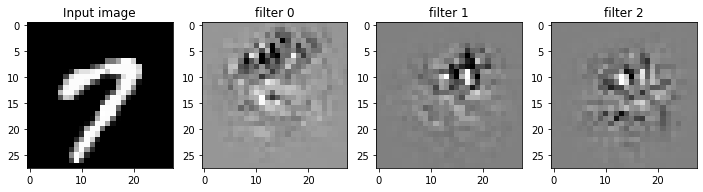

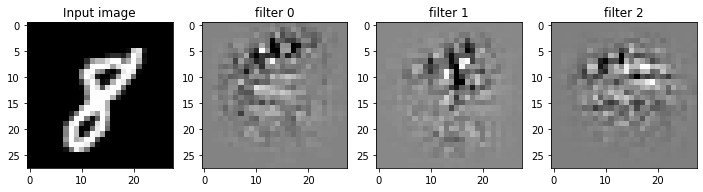

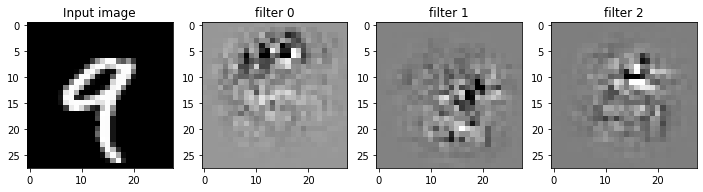

In [207]:
ln = 'c7'
vis_img_in_filter(img = np.array(X_train[1]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[3]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[5]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[7]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[0]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[13]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[15]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[17]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)
vis_img_in_filter(img = np.array(X_train[4]).reshape((1, 28, 28, 1)).astype(np.float64),  layer_name = ln)